In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# load dataset into Pandas DataFrame, local File Path (fp)
# fp = "C:\Machine Learning Data Files\FP_DLP\ML_June2020_DataSet_CSV.csv"
fp = "/Users/jpquinn/Documents/Udemy Machine Learning and Data Science/DataFiles/ML_June2020_DataSet_CSV.csv"

In [3]:
df = pd.read_csv(fp)

In [4]:
#print(df.loc[:,['Apps','Channel']].values) #print all ;,
#print(df.loc[0:9,['Apps','Channel']].values) #print top 10 0:9,
#print(df.loc[-4:,['Apps','Channel']].values) #print botton 10 -10:,

In [5]:
for col in ['Apps','Chain-of-Command','Channel',\
            'Contractor','Country','Data Center',\
            'Direction','EventDateDay','Org Name',\
            'Policy','User Action','Validity',\
            'Vice President Org','Zip Code']:
    df[col] = df[col].astype('category').cat.codes
#print(df)

In [6]:
#print(df['Apps'].values)
#print(df)
#print(df['Apps'])
#print(type(df))
#print(type(df['Apps'].astype('str')))
#print(df.loc[:,'Apps'])
#print(df.loc[:,'Apps'].values)

In [7]:
# preprocess phase
from sklearn.preprocessing import StandardScaler

In [8]:
#print(df.columns)
features = ['Apps','Chain-of-Command','Channel','Contractor','Country','Data Center','Direction','EventDateDay','Incident ID','Org Name','Policy','Risk Level','Transsize','User Action','Validity','Vice President Org','Violations','Zip Code']

In [9]:
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [10]:
#print(x)

In [11]:
# decomp phase
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
    , columns = ['principal component 1', 'principal component 2'])

In [12]:
#print(principalDf)

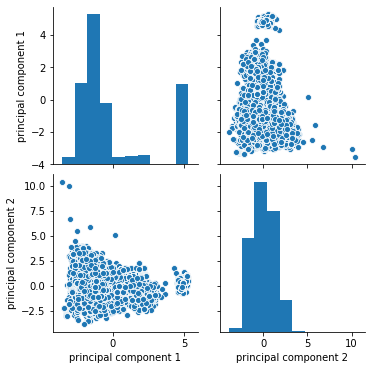

In [13]:
sns.pairplot(principalDf) 

In [14]:
# SNS Pair plots, very large
#sns.pairplot(df)  # df loc # this call is too large for memory
#sns.pairplot(df.loc[:,['Apps','Channel','Data Center','Direction','Org Name','Policy','User Action','Validity','Violations']])
#sns.pairplot(df.loc[:,['Apps','Channel','Org Name','Policy','User Action','Validity']])
#sns.pairplot(df.loc[:,['Apps','Channel','Policy','Validity']])

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


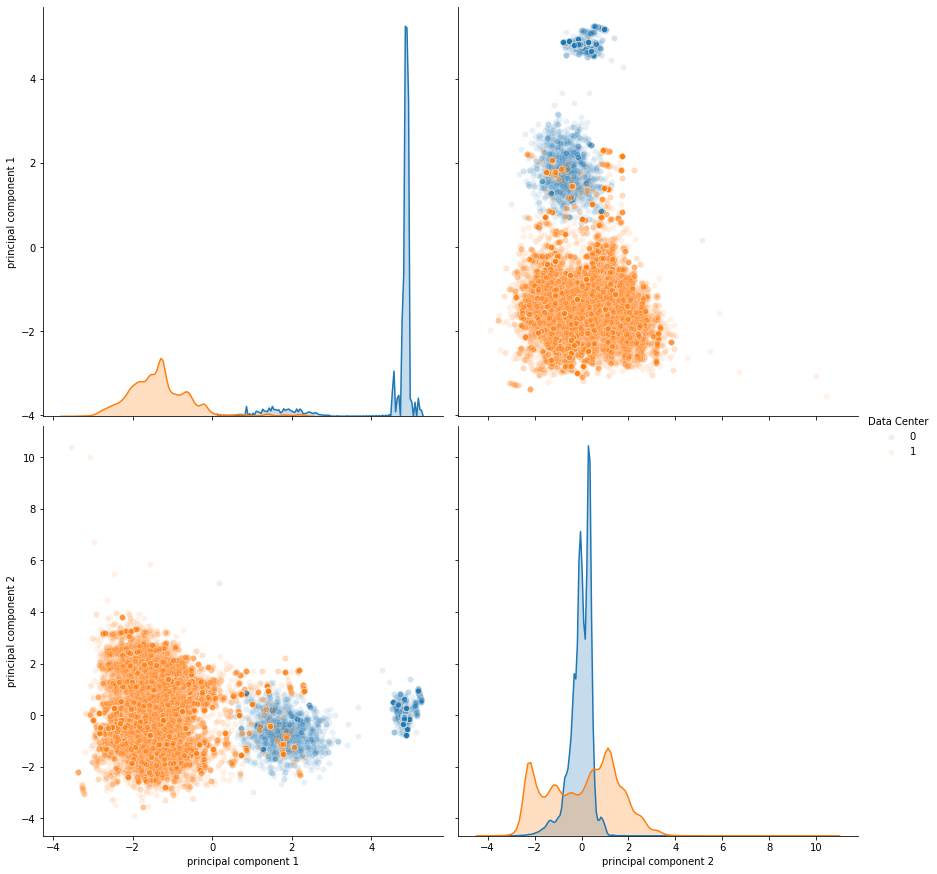

In [15]:
finalDf1 = pd.concat([principalDf, df[['Data Center']]], axis = 1) 
sns.pairplot(finalDf1,hue='Data Center',size=6, plot_kws={'alpha': 0.1})

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


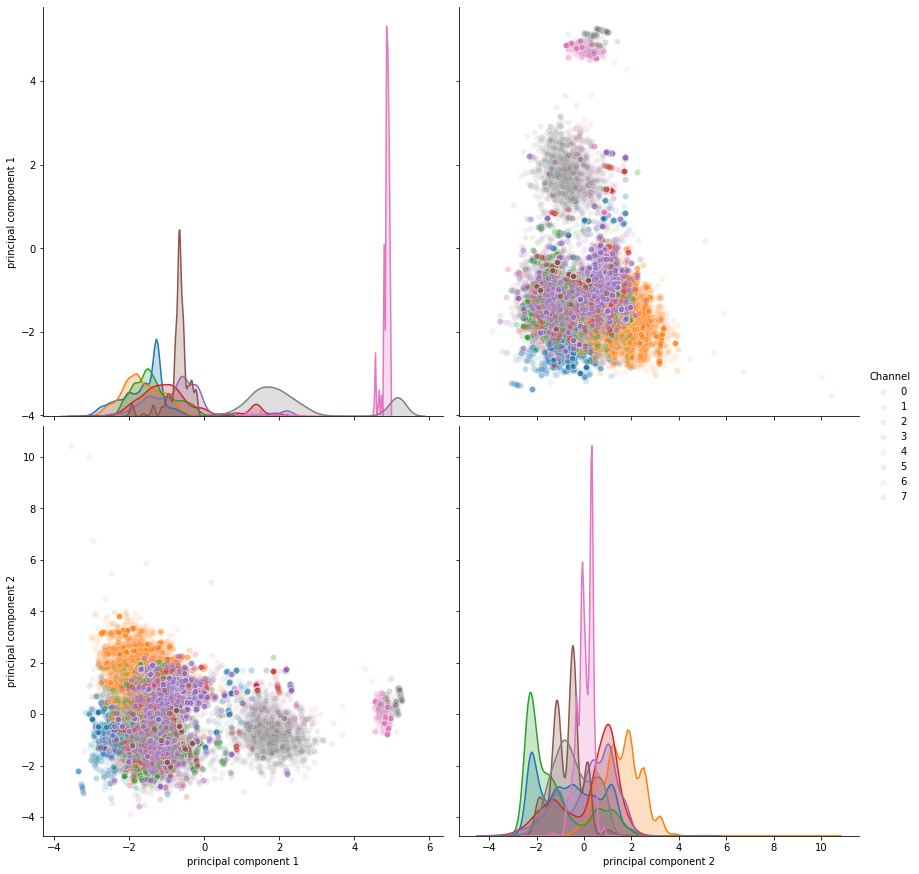

In [16]:
finalDf1 = pd.concat([principalDf, df[['Channel']]], axis = 1) 
sns.pairplot(finalDf1,hue='Channel',size=6, plot_kws={'alpha': 0.1})

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packag

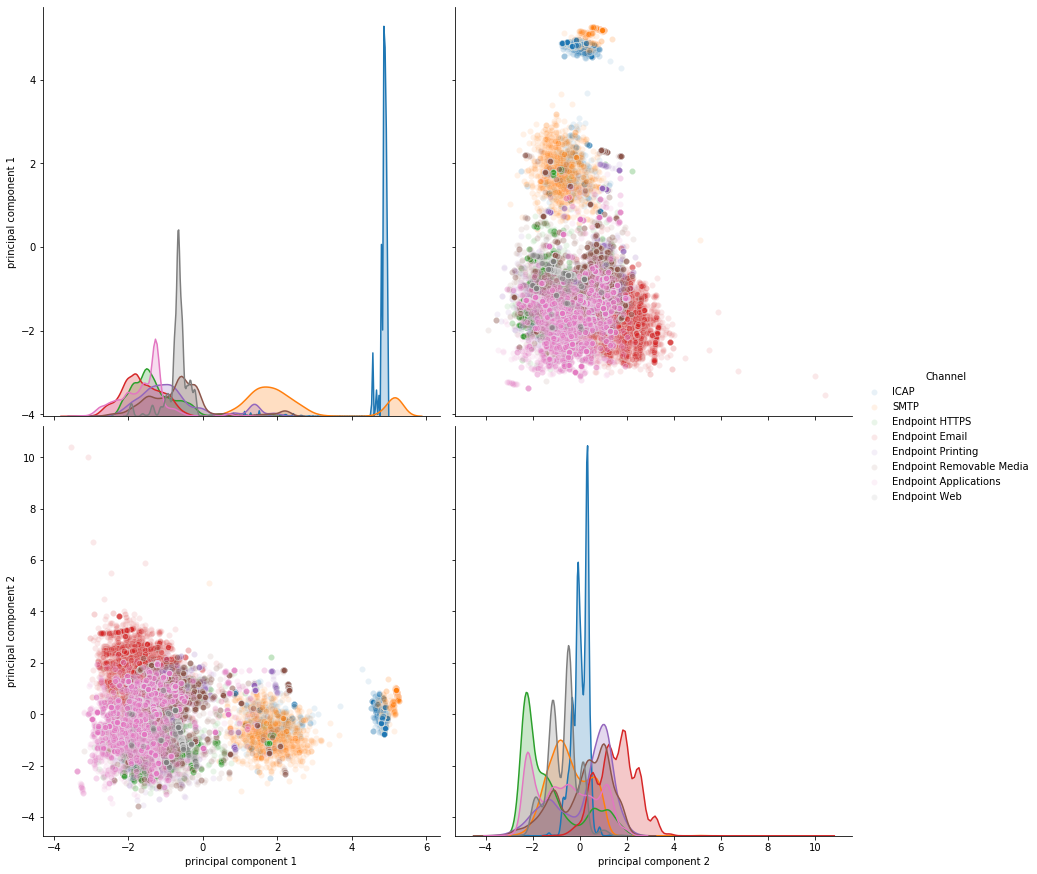

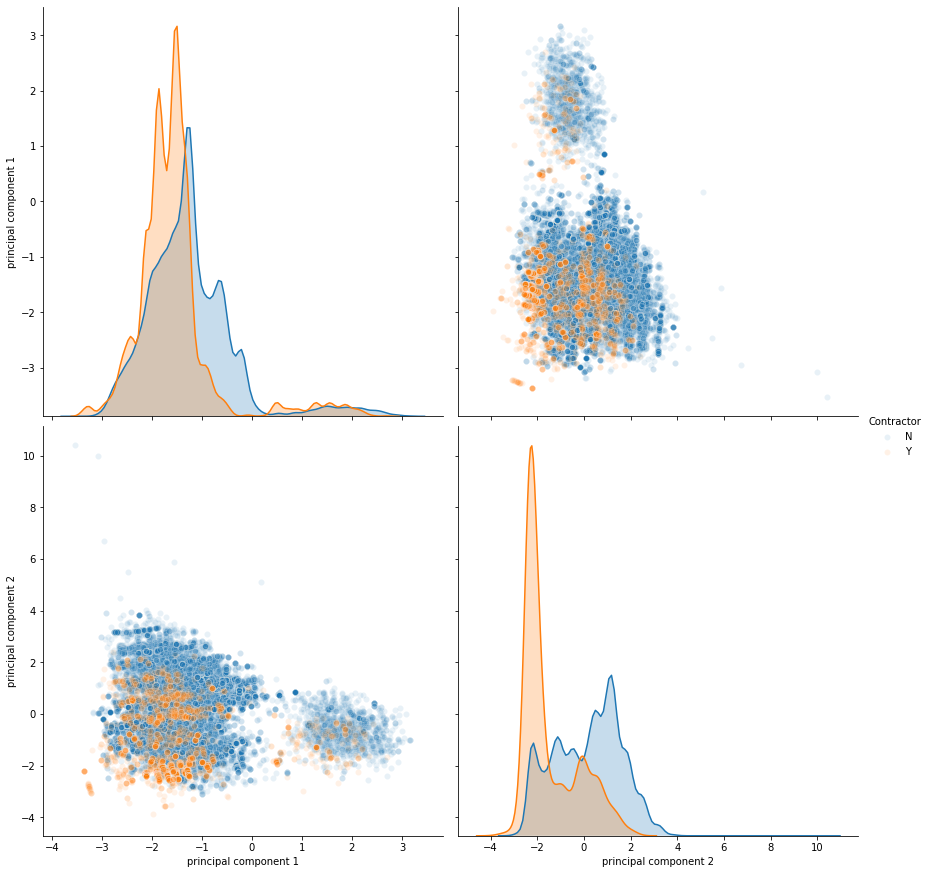

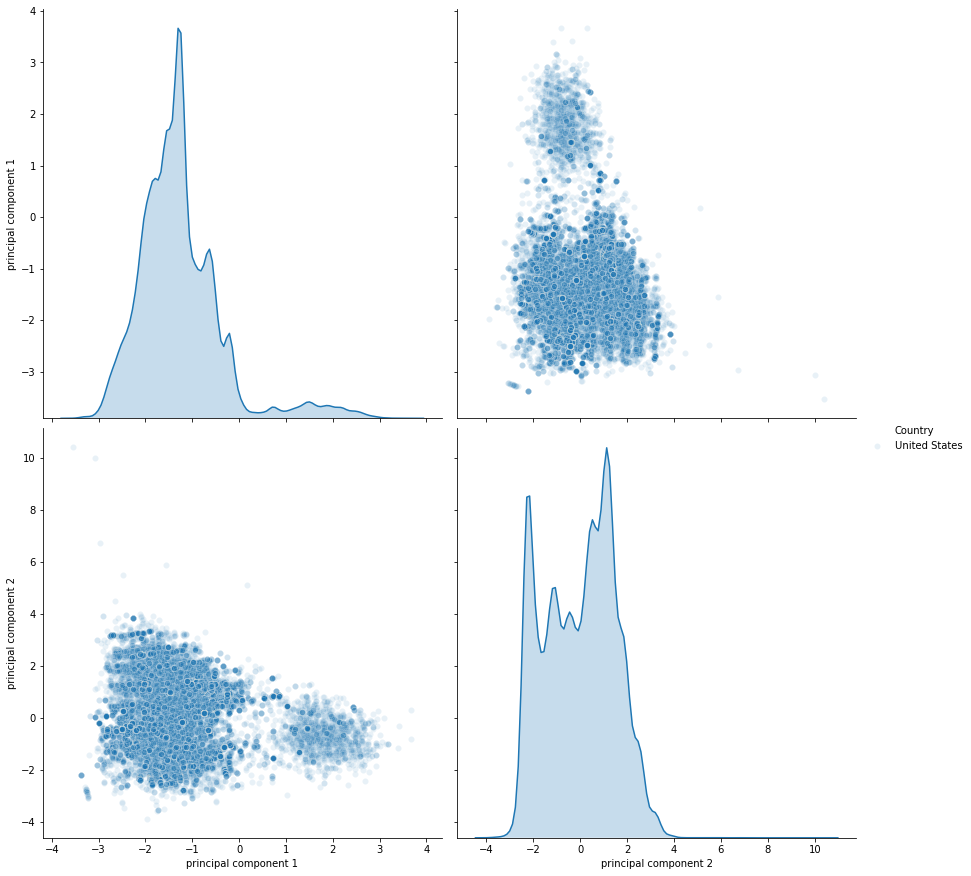

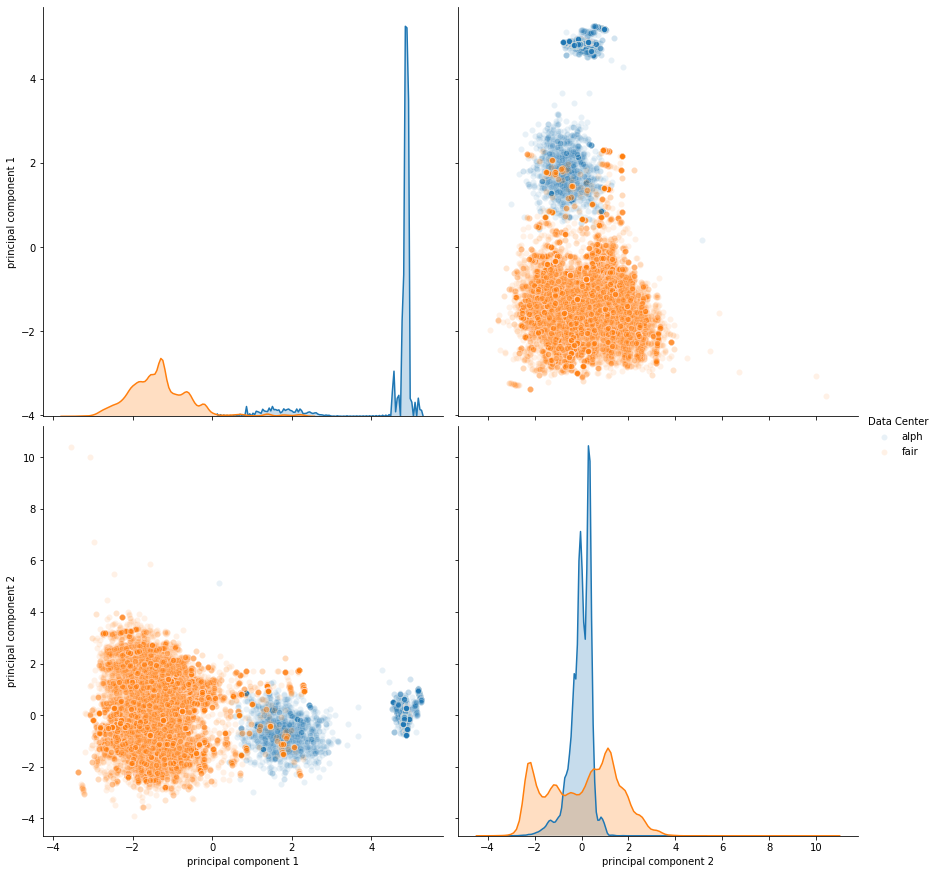

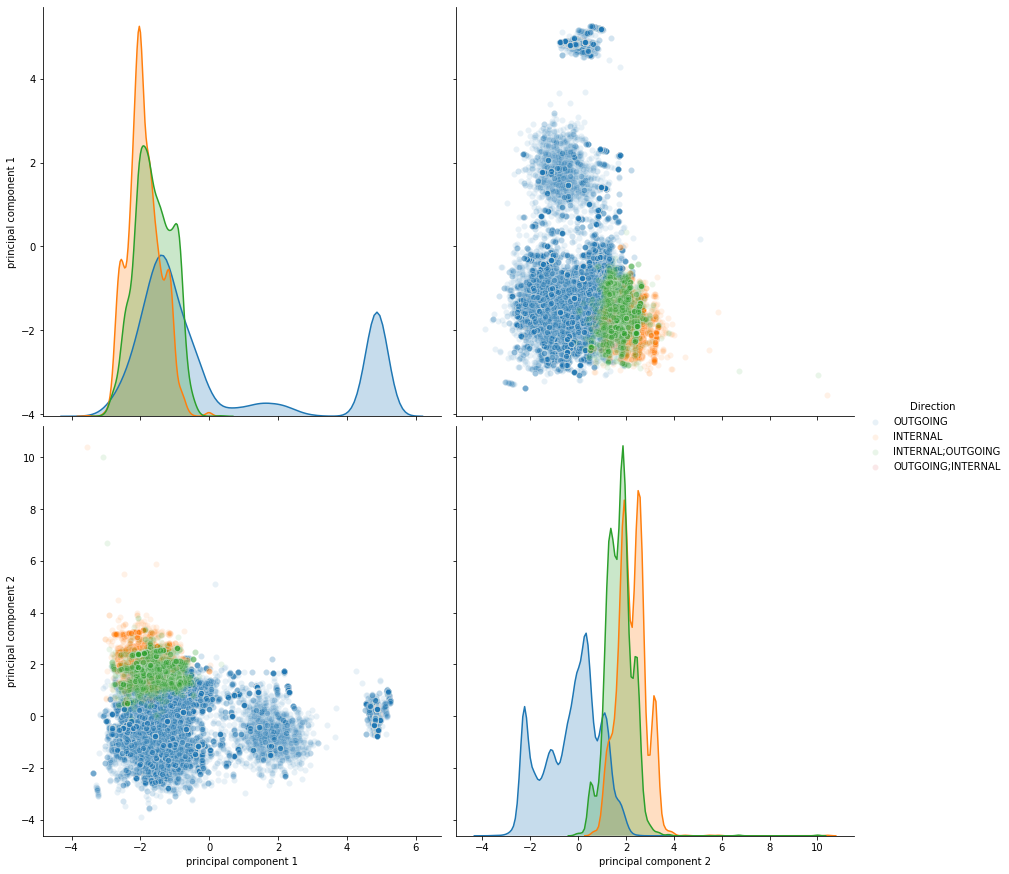

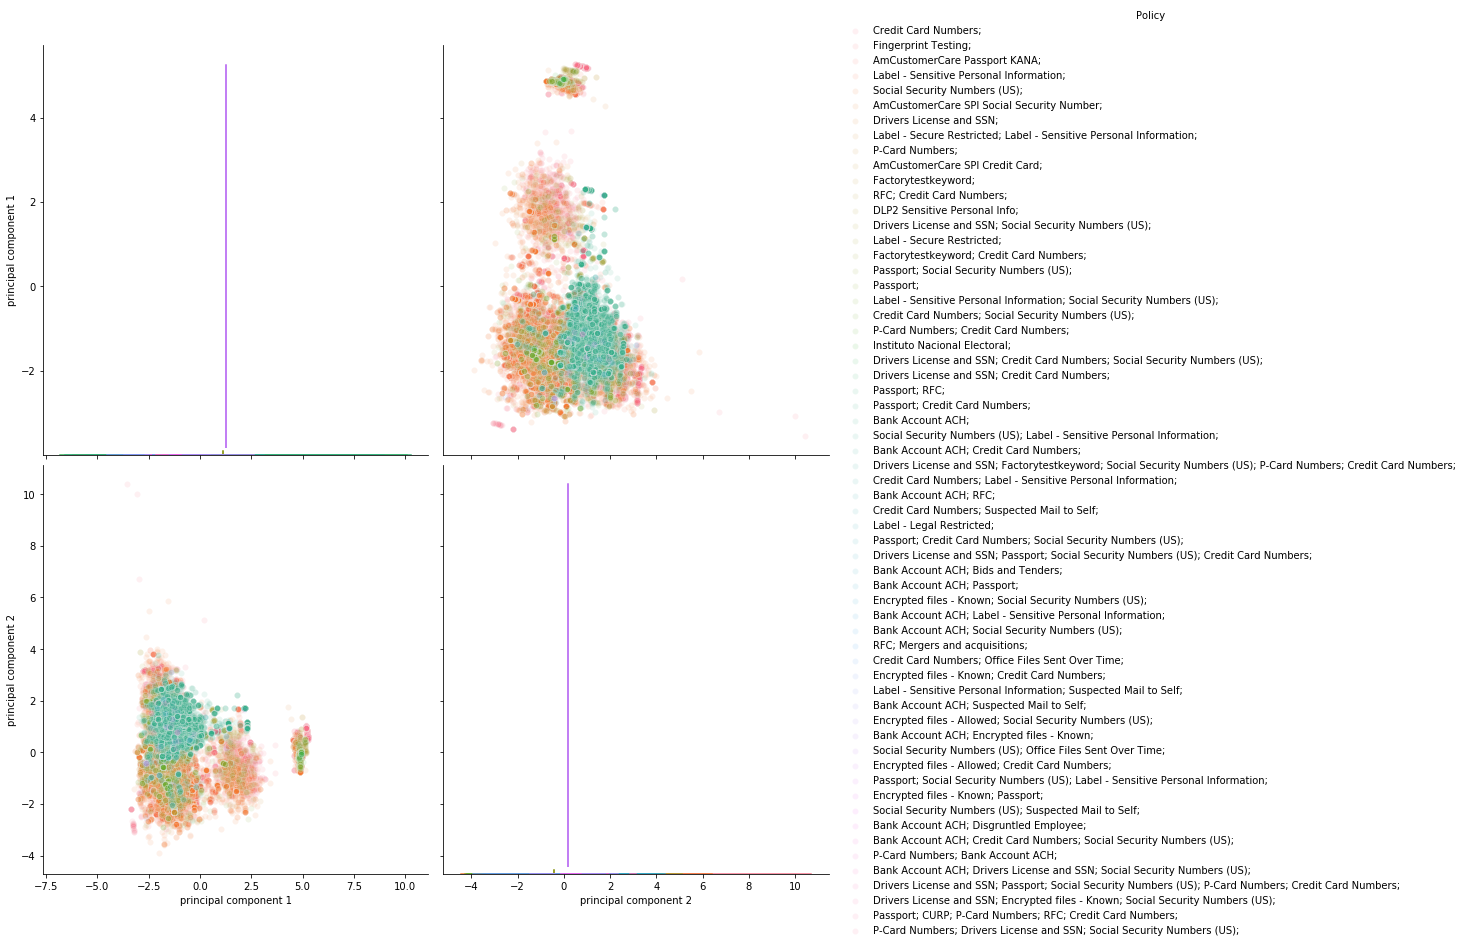

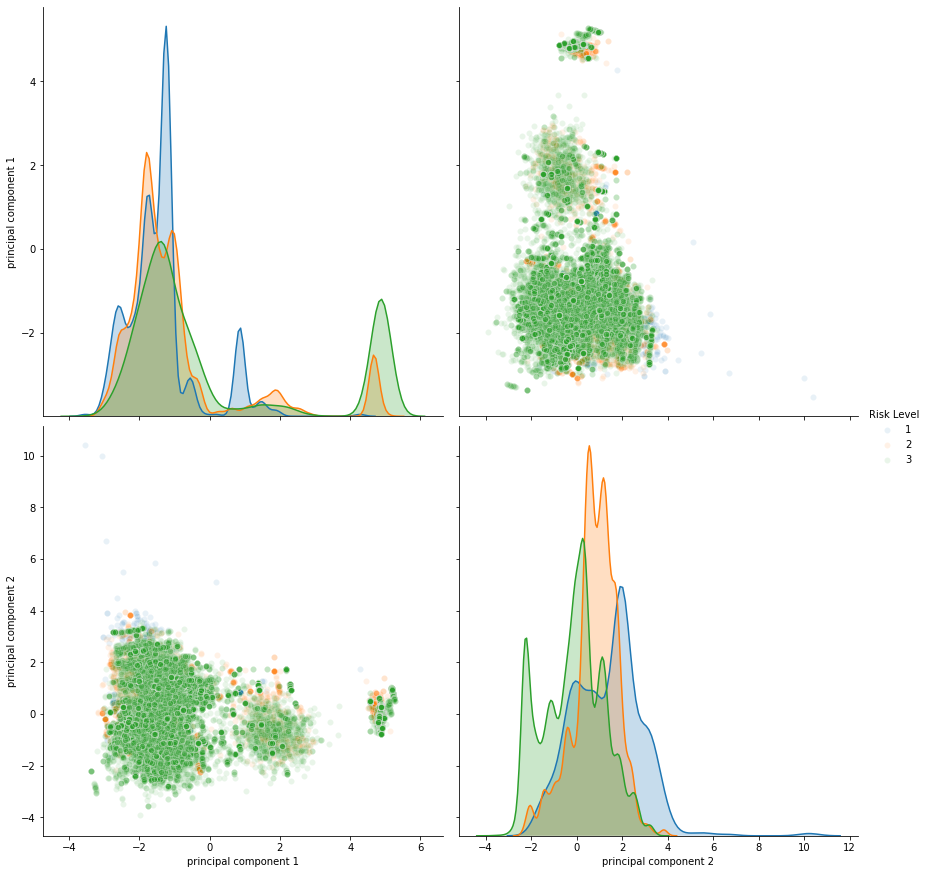

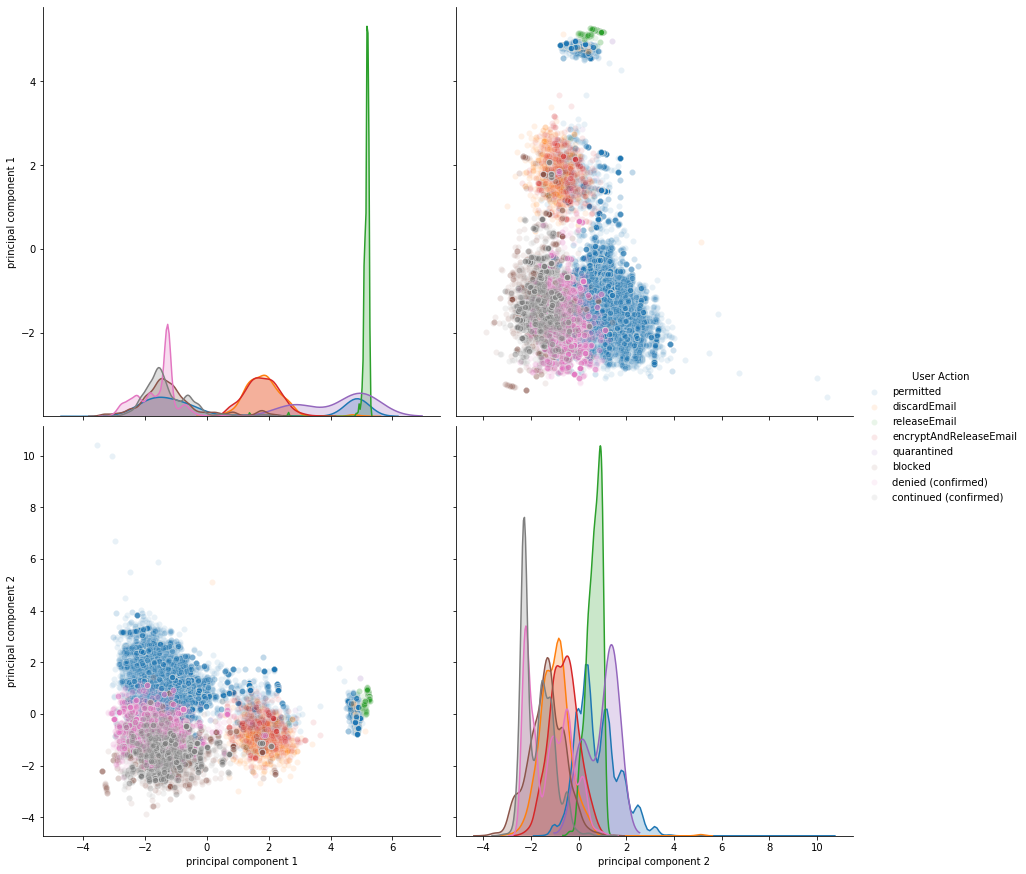

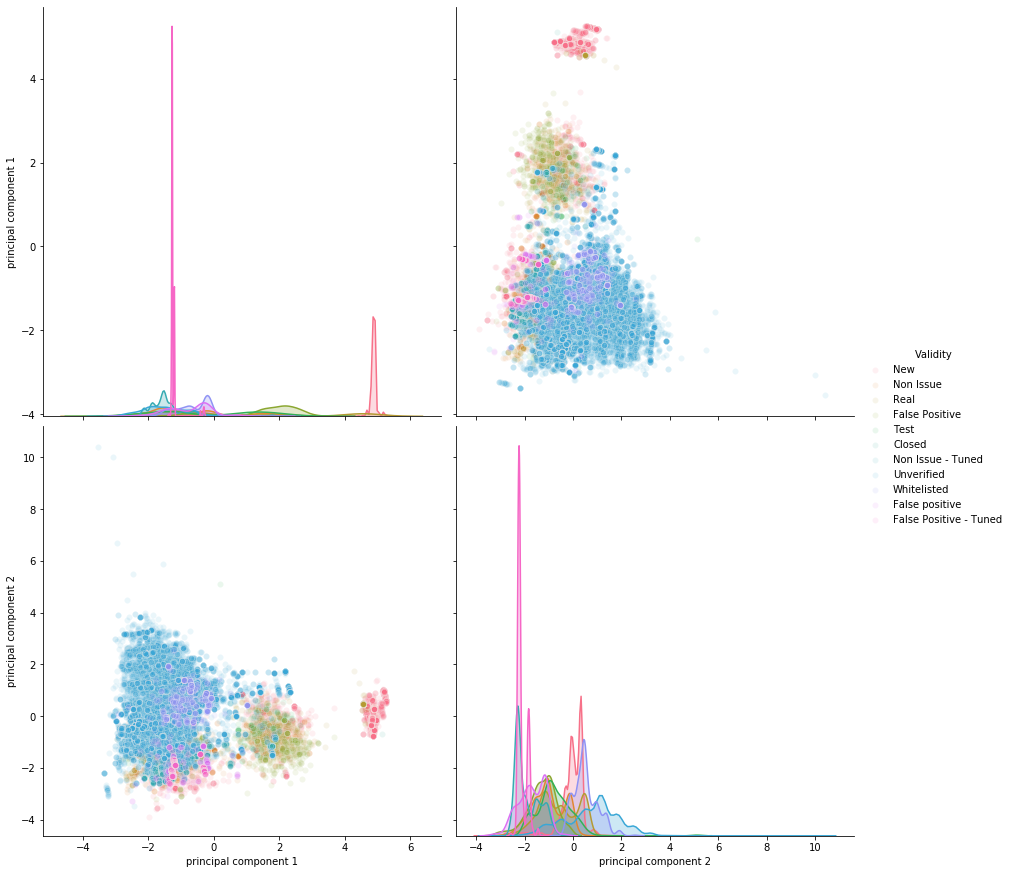

In [17]:
dfRaw = pd.read_csv(fp)
features = ['Channel', 'Contractor', 'Country',\
       'Data Center', 'Direction',\
       'Policy', 'Risk Level', 'User Action', 'Validity']
for f in features:
    try:
        finalDf1 = pd.concat([principalDf, dfRaw[[f]]], axis = 1)
        sns.pairplot(finalDf1,hue=f,size=6, plot_kws={'alpha': 0.1})
    except:
        print("No luck with: ",f)